# For time saving we saved our text transformations into pickle file and there is section called 'Start here' you can uncomment it and start seeing Clustering results

# Install nltk library and download Gutenberg's digital books from it

In [8]:
! pip install nltk
! pip install yellowbrick
! pip install umap-learn
! pip install plotly
! pip install transformers
! pip install pyLDAvis
! pip install pyyaml==5.4.1
seed=42

In [2]:
import numpy as np
import pandas as pd
import nltk

nltk.download('gutenberg')
books_names=nltk.corpus.gutenberg.fileids()
books_names

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Kirolos\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

# Data Exploration

<h3>Choose 5 books from the diffrant category and different authors<h3>

In [3]:
books_idx=[2,3,13,-6,9]
selected_books=[]
for idx in books_idx :
  selected_books.append(books_names[idx])
print(selected_books)

['austen-sense.txt', 'bible-kjv.txt', 'milton-paradise.txt', 'melville-moby_dick.txt', 'chesterton-brown.txt']


<h3>Firstly , let's see these books content

In [4]:
book_contents=[]
for book_name in selected_books:
  book_contents.append(nltk.corpus.gutenberg.raw(book_name))
book_contents[0]

'[Sense and Sensibility by Jane Austen 1811]\n\nCHAPTER 1\n\n\nThe family of Dashwood had long been settled in Sussex.\nTheir estate was large, and their residence was at Norland Park,\nin the centre of their property, where, for many generations,\nthey had lived in so respectable a manner as to engage\nthe general good opinion of their surrounding acquaintance.\nThe late owner of this estate was a single man, who lived\nto a very advanced age, and who for many years of his life,\nhad a constant companion and housekeeper in his sister.\nBut her death, which happened ten years before his own,\nproduced a great alteration in his home; for to supply\nher loss, he invited and received into his house the family\nof his nephew Mr. Henry Dashwood, the legal inheritor\nof the Norland estate, and the person to whom he intended\nto bequeath it.  In the society of his nephew and niece,\nand their children, the old Gentleman\'s days were\ncomfortably spent.  His attachment to them all increased.\n

<h3>From the previous results,we can see that the books have many problems in their content ,so we should clean them

# Data Preprocessing

## Clean the content of the books by word lowering, replacing some patterns, Lemmatization and tokenization.

In [5]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kirolos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kirolos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Kirolos\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Kirolos\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kirolos\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [6]:
import re

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def clean_text(text):
    lemmatizer = WordNetLemmatizer()
    sub_pattern = r'[^A-Za-z]'
    split_pattern = r"\s+"
    #remove stop words
    stop_words = stopwords.words('english') + ['never','ever','couldnot','wouldnot','could','would','us',"i'm","you'd"]
    lower_book = text.lower()                                              # Converting all words into lower case.
    filtered_book = re.sub(sub_pattern,' ',lower_book).lstrip().rstrip()   # Replacing all characters except those in the pattern into spaces.
    filtered_book = word_tokenize(filtered_book)                      # tokenizethe whole book into words in a list.
    filtered_book = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in filtered_book if word not in stop_words]
    return filtered_book


In [7]:
cleaned_books_contents=[]
for book in book_contents :
  cleaned_books_contents.append(clean_text(book))
# cleaned_books_contents[0]

## Creating 200 random samples from each book and make each sample contains 150 word

In [8]:
def book_samples(book,n_samples, n_doc) :
    # book_list=book.split(' ')
    import random
    samples=[]
    start=0
    while start + n_samples < len(book)-1:
        # start=random.randint(start,start+20)
        temp1=""
        # if start+100 > len(book_list)-1 :
        #     break
        for j in range(start,start+n_samples):
            temp1+= book[j] + " "
        samples.append(temp1)
        start+= n_samples
    random_samples_index=random.sample(range(0,len(samples)),k=min(n_doc,len(samples)))
    partitions=[]
    for idx in random_samples_index :
        partitions.append(samples[idx])
    return partitions

In [9]:
samples_of_books=[]
for cleaned_book in cleaned_books_contents :
  samples_of_books.append(book_samples(cleaned_book,150,200))
samples_of_books

[['great dependence world upon secrecy really thought behaviour ask many question mr ferrars must seem odd ought explain think mr ferrars displeased know trust know high opinion world family look upon miss dashwoods quite sister pause elinor moment remain silent astonishment heard first great word length force speak speak cautiously say calmness manner tolerably well conceal surprise solicitude may ask engagement long stand engage four year four year yes elinor though greatly shock still felt unable believe know say even acquaint till day acquaintance however many year date uncle care know considerable uncle yes mr pratt hear talk mr pratt think reply elinor exertion spirit increase increase emotion four year uncle life longstaple near plymouth acquaintance begin sister often stay uncle engagement form though till year quit pupil almost always afterwards unwilling enter may imagine without knowledge approbation mother young love well prudent ought though know well miss dashwood must ',

<h1>Creating a data frame that contains 2 columns and 1000 rows which represent the smaples of the books and the book name

In [10]:
import pandas as pd
data_frame =pd.DataFrame()
data_frame['Sample of the book']=[item for sublist in samples_of_books for item in sublist]
target=[[selected_books[i]]*min(200,len(samples_of_books[i])) for i in range(len(selected_books)) ]
data_frame['Book_name']=[item for sublist in target for item in sublist]
data_frame['Book_name'].unique()

array(['austen-sense.txt', 'bible-kjv.txt', 'milton-paradise.txt',
       'melville-moby_dick.txt', 'chesterton-brown.txt'], dtype=object)

<h3>Shuffling the output dataframe with sklearn

In [11]:
from sklearn.utils import shuffle
data_frame = shuffle(data_frame,random_state=seed)
data_frame

Sample of the book               Book_name
521  ethereal people ran hear know befel towards th...     milton-paradise.txt
737  yet uncatastrophied fifth act grief life drama...  melville-moby_dick.txt
740  whose water believe come holy land underground...  melville-moby_dick.txt
660  fatness sleeper bunk often startle sharp slap ...  melville-moby_dick.txt
411  ere join satan vast haughty stride advanced co...     milton-paradise.txt
..                                                 ...                     ...
106  country heart seem usually open every feel att...        austen-sense.txt
270  publish proclaim city jerusalem say go forth u...           bible-kjv.txt
860  young brother might formidable sword stick fla...    chesterton-brown.txt
435  fly pain profess next spy argues leader liear ...     milton-paradise.txt
102  absolutely unnecessary highly indecorous widow...        austen-sense.txt

[1000 rows x 2 columns]

In [12]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y= label_encoder.fit_transform(data_frame['Book_name'])
data_frame['Book_name']=y
y_actual = y

# Word Embedding

## BOW

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
BOW = CountVectorizer()
BOW_transformation = BOW.fit_transform(data_frame['Sample of the book'])

## TF_IDF<br>


Tf_idf with unigram has been applied.

In addition, to understand the relation between each consecutive pair of words, tfidf with bigram has applied.
  
Furthermore, we applied tfidf with trigram to find out wether there is a relation between each consecutive three words.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
def tfidf_ngram(n_gram,X_train=data_frame['Sample of the book']):
    vectorizer = TfidfVectorizer(ngram_range=(n_gram,n_gram))
    x_train_vec = vectorizer.fit_transform(X_train)
    return x_train_vec

### Applying tfidf with 1-gram, 2-gram and 3-gram

In [16]:
# Applying tfidf with 1-gram, 2-gram and 3-gram
tfidf_1g_transformation= tfidf_ngram(1,X_train=data_frame['Sample of the book'])
tfidf_2g_transformation= tfidf_ngram(2,X_train=data_frame['Sample of the book'])

## Doc to vector

In [17]:
#Import packages
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
# Tokenization of each document
tokenized_doc = []
for d in data_frame['Sample of the book']:
    tokenized_doc.append(word_tokenize(d.lower()))
# tokenized_doc

# Convert tokenized document into gensim formated tagged data
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_doc)]
tagged_data[0]

TaggedDocument(words=['ethereal', 'people', 'ran', 'hear', 'know', 'befel', 'towards', 'throne', 'supreme', 'accountable', 'make', 'haste', 'make', 'appear', 'righteous', 'plea', 'utmost', 'vigilance', 'easily', 'approve', 'high', 'eternal', 'father', 'secret', 'cloud', 'amidst', 'thunder', 'uttered', 'thus', 'voice', 'assemble', 'angel', 'ye', 'power', 'return', 'unsuccessful', 'charge', 'dismayed', 'troubled', 'tidings', 'earth', 'sincerest', 'care', 'prevent', 'foretold', 'lately', 'come', 'pas', 'first', 'tempter', 'cross', 'gulf', 'hell', 'told', 'ye', 'prevail', 'speed', 'bad', 'errand', 'man', 'seduce', 'flatter', 'believe', 'lie', 'maker', 'decree', 'mine', 'concur', 'necessitate', 'fall', 'touch', 'light', 'moment', 'impulse', 'free', 'incline', 'left', 'even', 'scale', 'fall', 'rest', 'mortal', 'sentence', 'pas', 'transgression', 'death', 'denounce', 'day', 'presumes', 'already', 'vain', 'void', 'yet', 'inflict', 'fear', 'immediate', 'stroke', 'soon', 'shall', 'find', 'forbea

In [18]:
# Train doc2vec model
model = Doc2Vec(tagged_data, vector_size=50, window=2, min_count=1, workers=4, epochs = 100)
# Save trained doc2vec model
model.save("test_doc2vec.model")

In [19]:
## Load saved doc2vec model
model= Doc2Vec.load("test_doc2vec.model")
## Print model vocabulary
def get_doc2vec_vector(df):
    doc2vec_vectors=[]
    for sentence in data_frame['Sample of the book']:
        doc2vec_vectors.append(model.infer_vector(word_tokenize(sentence.lower())))
    return doc2vec_vectors
doc2vec_vectors=get_doc2vec_vector(data_frame['Sample of the book'])
len(doc2vec_vectors)

1000

## Using BERT as pretrained model

In [20]:
!pip install transformers

## BERT is the encoder of transformers and it consists of 12 layers ,so we can take the output of these layers as the embedded vector

#### Embed the full sectence by taking the mean of the embedding vectors of the tokenized words

In [21]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():

    # Tell PyTorch to use the GPU.
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1050 Ti


In [22]:
# Import Libraries
import tensorflow as tf
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertModel
from keras_preprocessing.sequence import pad_sequences
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Create sentence and label lists
sentences = data_frame['Sample of the book'].values

# We need to add special tokens at the beginning and end of each sentence for BERT to work properly
sentences = ["[CLS] " + sentence + " [SEP]" for sentence in sentences]
labels = data_frame.Book_name.values

# Initialize the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# Tokenize the sentences and put them in the list tokenized_texts
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
# Set the maximum sequence length. The longest sequence in our training set is 47, but we'll leave room on the end anyway.
# In the original paper, the authors used a length of 512.
MAX_LEN = 128
# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]
# Pad our input tokens
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
# Create attention masks
attention_masks = []
hidden_states=[]
# Create a mask of 1s for each token followed by 0s for padding
for seq in input_ids:
  seq_mask = [float(i>0) for i in seq]
  attention_masks.append(seq_mask)
# Conver the ids into a tensor representation
batch_size = 4
input_tensor = torch.tensor(input_ids)
masks_tensor = torch.tensor(attention_masks)
train_data = TensorDataset(input_tensor, masks_tensor)
dataloader = DataLoader(train_data, batch_size=batch_size)
# Initialize the model
model = BertModel.from_pretrained("bert-base-uncased",output_hidden_states = True,).to('cuda')
model.eval()
outputs = []
for input, masks in dataloader:
  torch.cuda.empty_cache() # empty the gpu memory

  # Transfer the batch to gpu
  input = input.to('cuda')
  masks = masks.to('cuda')
  # Run inference on the batch
  output = model(input, attention_mask=masks)
  # Transfer the output to CPU again and convert to numpy
  output = output[0].cpu().detach().numpy()
  # Store the output in a list
  outputs.append(output)

# Concatenate all the lists within the list into one list
outputs = [x for y in outputs for x in y]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [23]:
bert_vectors=np.array(outputs)
bert_vectors=bert_vectors.mean(axis=1)
bert_vectors.shape

(1000, 768)

## helper function

In [24]:
import gensim.downloader as api
def get_vectors_pretrained(df, model):
    embedding_vectors = []
    for partition in df['Sample of the book']:
        sentence = []
        for word in partition.split(' '):
            try:
                sentence.append(model[word])
            except:
                pass
        sentence = np.array(sentence)
        sentence = sentence.mean(axis=0)
        embedding_vectors.append(sentence)
    embedding_vectors = np.array(embedding_vectors)
    return embedding_vectors

## Glove

In [25]:
import gensim.downloader as api
glove_model = api.load("glove-wiki-gigaword-300")  # load glove vectors
glove_vectors=get_vectors_pretrained(data_frame,glove_model)
glove_vectors

array([[-0.07372067, -0.09232396, -0.0432254 , ..., -0.09639937,
        -0.04558247,  0.09737851],
       [-0.10600229, -0.0297405 , -0.06581365, ..., -0.00692519,
        -0.08655612,  0.1842851 ],
       [-0.03137869, -0.01923588, -0.01352786, ..., -0.03103245,
        -0.01875045, -0.01805739],
       ...,
       [-0.07862915,  0.03443554, -0.01756364, ..., -0.00411444,
        -0.05155482,  0.10430045],
       [-0.01639559, -0.15282589, -0.03384179, ..., -0.09508772,
         0.01445183,  0.09625574],
       [-0.06757847, -0.0287376 ,  0.00115391, ..., -0.05510816,
        -0.07075114,  0.0713177 ]], dtype=float32)

## Fast text

In [26]:
import gensim.downloader as api
fast_text_model = api.load("fasttext-wiki-news-subwords-300")  # load glove vectors
fast_text_vectors=get_vectors_pretrained(data_frame,fast_text_model)
fast_text_vectors

array([[-0.02130658,  0.00031555,  0.01497815, ...,  0.00270291,
        -0.01238737,  0.00992173],
       [-0.01414296, -0.01264503,  0.01831453, ...,  0.01989868,
        -0.00371187,  0.00264323],
       [-0.00790052,  0.00216526,  0.02486777, ...,  0.00325716,
         0.00027835,  0.01603646],
       ...,
       [-0.01047264, -0.00469515,  0.01925953, ...,  0.01210796,
        -0.00511285, -0.00521986],
       [-0.04288305, -0.01023788,  0.01332859, ...,  0.02318772,
        -0.00711585,  0.00405572],
       [-0.00875606, -0.00615934,  0.02325141, ...,  0.00303594,
        -0.01581794,  0.00797025]], dtype=float32)

## Word2Vec

In [27]:
import gensim.downloader as api
word2vec_model = api.load("word2vec-google-news-300")  # load glove vectors
word2vec_vectors = get_vectors_pretrained(data_frame,word2vec_model)
word2vec_vectors

array([[ 0.07098638,  0.04481828,  0.05328348, ..., -0.10021633,
         0.00052568,  0.02830695],
       [ 0.07721683,  0.05672667, -0.00548047, ..., -0.08307686,
         0.02103557,  0.04252293],
       [ 0.0715914 ,  0.05434028, -0.01616569, ..., -0.04394612,
         0.01155348,  0.00896417],
       ...,
       [ 0.07446691,  0.05679963,  0.0429849 , ..., -0.06882944,
        -0.00931281,  0.03996056],
       [ 0.08958906,  0.06020555,  0.04291626, ..., -0.10327311,
        -0.03411519,  0.04999153],
       [ 0.06051421,  0.03557254,  0.01380472, ..., -0.04134832,
         0.02964374,  0.02138423]], dtype=float32)

## LDA transformation

In [28]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import matplotlib.pyplot as plt
import gensim
#data_frame=pd.read_csv('new_data.csv')
paragraphs = data_frame["Sample of the book"].to_list()
docs = []

for sen in paragraphs:
    docs.append(list(sen.split()))
print(len(docs))

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.8)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]
print(len(corpus[2]))
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))


1000
64
Number of unique tokens: 1213
Number of documents: 1000


In [29]:
# Set training parameters.
num_topics = 5
chunksize = 2000
passes = 20
iterations = 400
eval_every = None  # Don't evaluate model perplexity, takes too much time.

# Make a index to word dictionary.
temp = dictionary[0]  # This is only to "load" the dictionary.
id2word = dictionary.id2token
#print(len(dictionary))
model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

top_topics = model.top_topics(corpus) #, num_words=20)

# Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
avg_topic_coherence = sum([t[1] for t in top_topics]) / num_topics
print('Average topic coherence: %.4f.' % avg_topic_coherence)

Average topic coherence: -1.2853.


In [30]:
all_topics = model.get_document_topics(corpus)
num_docs = len(all_topics)

all_topics_csr = gensim.matutils.corpus2csc(all_topics)
lda_to_cluster = all_topics_csr.T.toarray()
lda_to_cluster.shape

(1000, 5)

In [31]:
!pip install pyLDAvis

In [38]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(model, corpus, dictionary=dictionary)
pyLDAvis.display(vis)

C:\Users\Kirolos\AppData\Local\Programs\Python\Python310\lib\site-packages\pyLDAvis\_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [39]:
from gensim.models.coherencemodel import CoherenceModel
## Evaluating coherence of gensim LDA model
cm = CoherenceModel(model=model, corpus=corpus, coherence='u_mass')
coherence_score = cm.get_coherence()
print(coherence_score)

-1.285301034641255


# Word embedding dictionary

In [40]:
text_embedding={
    'BOW':BOW_transformation.toarray(),
    'TF_IDF 1_gram':tfidf_1g_transformation.toarray(),
    'Doc2vec':np.array(doc2vec_vectors),
    'Glove':glove_vectors,
    'FastText':fast_text_vectors,
    'Word2vec':word2vec_vectors,
    'BERT':bert_vectors,
    'LDA':lda_to_cluster,
}

### Save word Embedding as a pickle file

In [41]:
import pickle
a_file = open("EmbeddingText_edited.pkl", "wb")
pickle.dump(text_embedding, a_file)
a_file.close()
print('Saved')

Saved


# Start here

In [1]:
import pickle
import pandas as pd
import numpy as np
with open('EmbeddingText_edited.pkl', 'rb') as f:
    text_embedding = pickle.load(f)
y_actual=list(pd.read_csv('dataset.csv')['Book_name'])
seed=42

In [2]:
data_frame = pd.read_csv('dataset.csv').drop('Unnamed: 0', axis=1)

# Visualization of the Transformation

In [3]:
import plotly.express as px
from sklearn.decomposition import PCA
pca=PCA(n_components=2,)
embedding=text_embedding.copy()

for key in embedding.keys():
  embedding[key]=pca.fit_transform(embedding[key])
  df=pd.DataFrame({'PCA1':embedding[key][:,0],'PCA2':embedding[key][:,1],'Target':y_actual})
  fig = px.scatter(data_frame =df, x='PCA1', y='PCA2', color='Target')
  fig.update_layout(title={'text':f'{key}','x':0.5},height=500,width=700)
  fig.show()

# Clustring

## helper functions

### Mapping function

In [14]:
def label_mapping(num, y_actual, y_target, df_labels):
    if num == df_labels[df_labels[y_actual]==0][y_target].value_counts().idxmax():
        return 0
    if num == df_labels[df_labels[y_actual]==1][y_target].value_counts().idxmax():
        return 1
    if num == df_labels[df_labels[y_actual]==2][y_target].value_counts().idxmax():
        return 2
    if num == df_labels[df_labels[y_actual]==3][y_target].value_counts().idxmax():
        return 3
    if num ==df_labels[df_labels[y_actual]==4][y_target].value_counts().idxmax():
        return 4
    else :
      return num

In [15]:
def lab(df):
    for i in range(5):
      cluster_idx=df[df['y_pred']==i].index.to_list()
      if len(cluster_idx)>0:
        right_cluster=df.loc[cluster_idx,'y_actual'].mode()[0]
        df['y_pred']=df['y_pred'].apply(lambda x: right_cluster+1000 if x==i else x)
    return df

## K-Means

In [16]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd
import nltk
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
from sklearn.metrics import cohen_kappa_score
warnings.filterwarnings('ignore')

In [17]:
text_embedding.keys()

dict_keys(['BOW', 'TF_IDF 1_gram', 'Doc2vec', 'Glove', 'FastText', 'Word2vec', 'BERT', 'LDA'])

### Applying K-means on many vectorizers

In [8]:
# function to apply k-means by passing the maximum number of clusters and the data
# Retrieving two dictionaries; first one has each K-value with its wcss and the latter has each K-value with its silhouette score
def run_KMeans(max_k, data):
    max_k+=1
    kmeans_elb_results = dict()
    kmeans_sil_results = dict()
    for k in range(2 , max_k):
        kmeans = KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , max_iter=300
                               , random_state = seed
                               , algorithm = 'full')
        kmeans.fit(data)
        kmeans_elb_results.update( {k : kmeans.inertia_} )
        kmeans_sil_results.update({k:silhouette_score(data, kmeans.labels_)})
        
    return  kmeans_elb_results, kmeans_sil_results

In [9]:
# Creating dictionary of each k-values for each vectorizer
seed = 42
kmeans_elb_vec = dict()
kmeans_sil_vec = dict()
for k,v in text_embedding.items():
    kmeans_elb_results, kmeans_sil_results = run_KMeans(10, v)
    kmeans_elb_vec[k] = kmeans_elb_results
    kmeans_sil_vec[k] = kmeans_sil_results

### Elbow Method to get the best number of clusters.

In [10]:
fig = make_subplots(rows=3, cols=3,horizontal_spacing=0.1,vertical_spacing=0.1);
i=j=1
for elb_vec_key, elb_vec_value in kmeans_elb_vec.items():
        fig.add_trace( 
            go.Scatter(
                x=list(elb_vec_value.keys()),
                y=list(elb_vec_value.values()),
                mode='lines',
                name=elb_vec_key,
                      ),row=i, col=j)
        j+=1
        if j == 4:
            j=1
            i+=1
fig.update_layout(height=1000, width=1000,title={'text':'K Means for each vectorizer using Elbow Method','x':0.5})
fig.show()

The elbow Voting in the Kmeans goes for 5 clusters

### Silhouette Method

In [11]:
fig = make_subplots(rows=3, cols=3,horizontal_spacing=0.1,vertical_spacing=0.1);
i=j=1
for sil_vec_key, sil_vec_value in kmeans_sil_vec.items():
        fig.add_trace( 
            go.Scatter(
                x=list(sil_vec_value.keys()),
                y=list(sil_vec_value.values()),
                mode='lines',
                name=sil_vec_key,
                      ),row=i, col=j)
        j+=1
        if j == 4:
            j=1
            i+=1
fig.update_layout(height=1000, width=1000,title={'text':'K Means for each vectorizer using Silhouette Method','x':0.5})
fig.show()

**As shown in the above methods that TFIDF, Glove, Bert, Doc2Vec, and LDA vectorizers divide these books into 5 clusters, besides LDA vectorizer has the highest silhouette score.**

### Getting the best Kappa Score amoung all vectorizers and choose the best one between them when K=5.

In [12]:
# vecs = ['Doc2vec','TF_IDF 1_gram','Glove','BERT', 'LDA']
vecs = list(text_embedding.keys())
vec_kappa = dict()
for vec in vecs:
  kmeans_doc2vec = KMeans(n_clusters = 5
                               , init = 'k-means++'
                               , n_init = 10
                               , max_iter=300
                               , random_state = seed
                               , algorithm = 'full')
  kmeans_doc2vec.fit(text_embedding[vec])
  y_pridect = kmeans_doc2vec.predict(text_embedding[vec]) 
  y_df = pd.DataFrame({'y_actual':y_actual, 'y_pred':y_pridect})
  y_df['y_pred'] = y_df['y_pred'].apply(lambda val: label_mapping(num=val, y_actual ='y_actual', y_target='y_pred', df_labels=y_df))
  # y_df['y_pred']=y_df['y_pred'].apply(lambda x : x-1000 if x > 20 else x)
  # y_df=lab(y_df)
  kappa_score = cohen_kappa_score(y_df['y_actual'], y_df['y_pred'])
  vec_kappa[vec] = kappa_score
vec_kappa

{'BOW': 0.6212500000000001,
 'TF_IDF 1_gram': 0.9625,
 'Doc2vec': 0.9925,
 'Glove': 0.7262500000000001,
 'FastText': 0.78,
 'Word2vec': 0.78375,
 'BERT': 0.39875000000000005,
 'LDA': -0.006250000000000089}

### Applying Cohen's Kappa on each method

In [13]:
fig = go.Figure()
obj = go.Bar(x = list(vec_kappa.keys()), y = list(vec_kappa.values()))
fig.add_trace(obj)
fig.update_layout(title={'text':'Kappa Score for Different Vectorizers','x':0.5},height=600,width=600)
fig.show()

**As shown in the above graph, K-means with Doc2vec has highest Kappa Score.**

### Visulaizing Clusters 


#### Applying PCA

In [14]:
from sklearn.decomposition import PCA

def apply_PCA(data):
    pca = PCA(n_components=2) 
    principalComponents = pca.fit_transform(data)
    principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
    return principalDf
pca_df = apply_PCA(text_embedding['Doc2vec'])
pca_df_final = pd.concat([pca_df, pd.Series(y_actual,name='target')],axis=1)
pca_df_final

principal component 1  principal component 2  target
0                 2.611125               1.886845       4
1                 1.141321               6.026727       3
2                -3.776254               4.335692       3
3                -0.922943               4.543597       3
4                 4.220959              -2.318779       4
..                     ...                    ...     ...
995              -4.015231              -4.480993       0
996               6.543859              -3.707799       1
997              -3.998137               0.480959       2
998               5.680249              -1.262661       4
999              -4.836730              -4.419851       0

[1000 rows x 3 columns]

#### Applying K-Means

In [15]:
kmeans = KMeans(n_clusters = 5
                               , init = 'k-means++'
                               , n_init = 10
                               , max_iter=300
                               , random_state = seed
                               , algorithm = 'full')
kmeans.fit(pca_df)
kmeans_labels = kmeans.predict(pca_df)
kmeans_df_final = pd.concat([pca_df, pd.Series(kmeans_labels,name='target')],axis=1)
centroids = kmeans.cluster_centers_
kmeans_df_final

principal component 1  principal component 2  target
0                 2.611125               1.886845       0
1                 1.141321               6.026727       3
2                -3.776254               4.335692       3
3                -0.922943               4.543597       3
4                 4.220959              -2.318779       4
..                     ...                    ...     ...
995              -4.015231              -4.480993       2
996               6.543859              -3.707799       4
997              -3.998137               0.480959       1
998               5.680249              -1.262661       4
999              -4.836730              -4.419851       2

[1000 rows x 3 columns]

#### Mapping Labels


In [16]:
df_labels1 = pd.DataFrame({'Labels':pca_df_final['target'], 'Predicted Labels': list(kmeans_df_final['target']) })
df_labels1['Predicted Labels'] = df_labels1['Predicted Labels'].apply(lambda val: label_mapping(num=val, y_actual ='Labels', y_target='Predicted Labels', df_labels=df_labels1))
# df_labels1['Predicted Labels']=df_labels1['Predicted Labels'].apply(lambda x : x-1000 if x > 20 else x)
kmeans_df_final['target'] = df_labels1['Predicted Labels']

In [17]:
from plotly.subplots import make_subplots
fig1 = px.scatter(data_frame =pca_df_final, x='principal component 1', y='principal component 2', color='target')
fig1.update_layout({'title':{'text': 'The Clusters with Actual Labels','x':0.5}},height=600,width=600)
fig1.show()
fig2 = px.scatter(data_frame =kmeans_df_final, x='principal component 1', y='principal component 2', color='target')
fig2.update_layout(annotations=[
        dict(
            font=dict(color='black',size=30),
            showarrow=False,
            x=centroids[0][0],
            y=centroids[0][1],
            text="X"),
        dict(
            font=dict(color='black',size=30),
            showarrow=False,
            x=centroids[1][0],
            y=centroids[1][1],
            text="X",
),
        dict(font=dict(color='black',size=30),
            showarrow=False,
            x=centroids[2][0],
            y=centroids[2][1],
            text="X",
        ),
dict(
            font=dict(color='black',size=30),
            showarrow=False,
            x=centroids[3][0],
            y=centroids[3][1],
            text="X",
        ),dict(
            font=dict(color='black',size=30),
            showarrow=False,
            x=centroids[4][0],
            y=centroids[4][1],
            text="X",
        )],height=600,width=600)
fig2.update_layout({'title':{'text': 'The Clusters with K-means','x':0.5},},height=600,width=600)
fig2.show()

## EM

In [9]:
import numpy as np
import pandas as pd 
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
y_df = pd.DataFrame({'y_actual':y_actual,'y_pred':y_actual})

### For BOW and TF_IDF we should perform PCA to decrease number of features

In [10]:
from sklearn.decomposition import PCA
pca=PCA(n_components=1000,)
text_embedding_pca=text_embedding.copy()
text_embedding_pca['BOW']=pca.fit_transform(text_embedding['BOW'])
text_embedding_pca['TF_IDF 1_gram']=pca.fit_transform(text_embedding['TF_IDF 1_gram'])

In [22]:
from sklearn.metrics import silhouette_score,cohen_kappa_score
n_clusters = np.arange(2,10)

silhouette_for_each_transformation=text_embedding_pca.copy()
for key in silhouette_for_each_transformation.keys():
    silhouette_for_each_transformation[key]=[]

bic_for_each_transformation=text_embedding_pca.copy()
for key in bic_for_each_transformation.keys():
    bic_for_each_transformation[key]=[]


labels_for_each_transformation=text_embedding_pca.copy()
for key in labels_for_each_transformation.keys():
    labels_for_each_transformation[key]=[]

kappa_for_each_transformation=text_embedding_pca.copy()

y_df = pd.DataFrame({'y_actual':y_actual,'y_pred':y_actual})
kero=0
for key in text_embedding_pca.keys():
    silhouette_scores=[]
    bic=[]
    aic=[]
    kappa_at_5=[]
    labels_list=[]
    for n in n_clusters :
        model=GaussianMixture(n, covariance_type='full', random_state=seed)
        labels=model.fit_predict(text_embedding_pca[key])
        silhouette_scores.append(silhouette_score(text_embedding_pca[key],labels=labels))
        if n==5 :
          y_df['y_pred']=labels
          y_df['y_pred']=y_df['y_pred'].apply(lambda row: label_mapping(num=row,y_actual = 'y_actual',y_target='y_pred',df_labels=y_df ))
          y_df['y_pred']=y_df['y_pred'].apply(lambda x: x-1000 if x>20 else x)
          # y_df=lab(y_df)
          # y_df['y_pred']=y_df['y_pred'].apply(lambda x: x-1000 if x>20 else x)
          if key=='Doc2vec' and n ==5 :
              kero=y_df['y_pred']
          right_labels_mapping=y_df['y_pred']
          kappa_at_5=cohen_kappa_score(y_actual,right_labels_mapping )
        bic.append(model.bic(text_embedding_pca[key]))
        labels_list.append(labels)
    silhouette_for_each_transformation[key].append(silhouette_scores)
    bic_for_each_transformation[key].append(bic)
    kappa_for_each_transformation[key]=kappa_at_5
    labels_for_each_transformation[key].append(labels_list)

### Check Silhouette scores

In [ ]:
idx=[(1,1),(1,2),(1,3),(2,1),(2,2),(2,3),(3,1),(3,2),(3,3)]
fig = make_subplots(rows=3, cols=3,horizontal_spacing=0.1,vertical_spacing=0.1);
count=0
for key in silhouette_for_each_transformation.keys() :
    silhouette_scores=list(silhouette_for_each_transformation[key][0])
    fig.add_trace(
            go.Scatter(
                x=list(n_clusters),
                y=list(silhouette_scores),
                mode='lines',
                name=key,
                      ),row=idx[count][0], col=idx[count][1])
    count+=1
fig.update_layout(height=1000, width=1000,title={'text':'Trying different K values to each transformation method and check the Silhouette score','x':0.5})
fig.show()

#### The highest silouette score when using LDA transformation and k =4

### BIC visualization

In [ ]:
idx=[(1,1),(1,2),(1,3),(2,1),(2,2),(2,3),(3,1),(3,2),(3,3)]
fig = make_subplots(rows=3, cols=3,horizontal_spacing=0.1,vertical_spacing=0.1);
count=0
for key in bic_for_each_transformation.keys() :
    bic_scores=list(bic_for_each_transformation[key][0])
    fig.add_trace(
            go.Scatter(
                x=list(n_clusters),
                y=list(bic_scores),
                mode='lines',
                name=key,
                      ),row=idx[count][0], col=idx[count][1])
    count+=1
fig.update_layout(height=1000, width=1000,title={'text':'Trying different K values to each transformation method and check the BIC scores','x':0.5})
fig.show()

### The lowest BIC model is Fast Text with k =2

### Check kappa scores when k =5 with all transformations

In [13]:
kappa_for_each_transformation

{'BOW': array([[-2.27364186e+00,  2.02612525e+00,  1.21900384e+00, ...,
         -2.87000409e-02,  9.99049297e-02,  5.19909013e-15],
        [-2.35918392e+00,  1.76185424e+00,  1.24779521e+00, ...,
          2.74908880e-02, -6.79504088e-02,  5.19909013e-15],
        [-2.25383566e+00,  1.41727387e+00,  9.61452660e-01, ...,
          4.63326686e-02, -3.10566005e-02,  5.19909013e-15],
        ...,
        [-2.40176943e+00,  4.51813898e-01,  3.75788384e-01, ...,
          4.21230438e-04,  2.62800280e-02,  5.19909013e-15],
        [-1.12112485e+00,  2.58959947e+00,  6.93365104e-01, ...,
         -1.64737853e-01, -1.17937589e-01,  5.19909013e-15],
        [-2.68567891e+00, -3.56654131e+00, -1.83676884e+00, ...,
          1.76678857e-01, -3.12348402e-01,  5.19909013e-15]]),
 'TF_IDF 1_gram': array([[-3.00595202e-02, -1.29015256e-01,  8.35139368e-02, ...,
         -7.07811044e-04,  5.40706399e-03,  6.36092449e-17],
        [-4.13118121e-02, -1.70183322e-01, -5.30443251e-03, ...,
         -6.37

#### According to kappa scores ,so the best representation is Doc2Vec with k=5


### Visualization

#### Let's see the visualization with Doc2Vec with k=5 with all transformations

In [25]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2,)
embedding=text_embedding.copy()
key='Doc2vec'
embedding[key]=pca.fit_transform(embedding[key])
df=pd.DataFrame({'PCA1':embedding[key][:,0],'PCA2':embedding[key][:,1],'Target':kero})
fig = px.scatter(data_frame =df, x='PCA1', y='PCA2', color='Target')
fig.update_layout(title={'text':f'{key}','x':0.5},height=500,width=500)
fig.show()

#### Highest silloutte score is the LDA

In [26]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2,)
embedding=text_embedding.copy()
key='LDA'
embedding[key]=pca.fit_transform(embedding[key])
df=pd.DataFrame({'PCA1':embedding[key][:,0],'PCA2':embedding[key][:,1],'Target':labels_for_each_transformation[key][0][3]})
fig = px.scatter(data_frame =df, x='PCA1', y='PCA2', color='Target')
fig.update_layout(title={'text':f'{key}','x':0.5},height=500,width=500)
fig.show()

### Lowest BIC score is FastText with k =2

In [27]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2,)
embedding=text_embedding.copy()
key='FastText'
embedding[key]=pca.fit_transform(embedding[key])
df=pd.DataFrame({'PCA1':embedding[key][:,0],'PCA2':embedding[key][:,1],'Target':labels_for_each_transformation[key][0][0]})
fig = px.scatter(data_frame =df, x='PCA1', y='PCA2', color='Target')
fig.update_layout(title={'text':f'{key}','x':0.5},height=500,width=500)
fig.show()

### According to human labels, so the best model is Doc2vec with k=5.

## Hierarchical

In [28]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from yellowbrick.text import TSNEVisualizer
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

def plot_cluster(model,X):
    yhat = model.fit_predict(X)
    clusters = unique(yhat)

    tsne = TSNEVisualizer(random_state=seed)
    tsne.fit(X, yhat)
    tsne.show()

In [29]:
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering

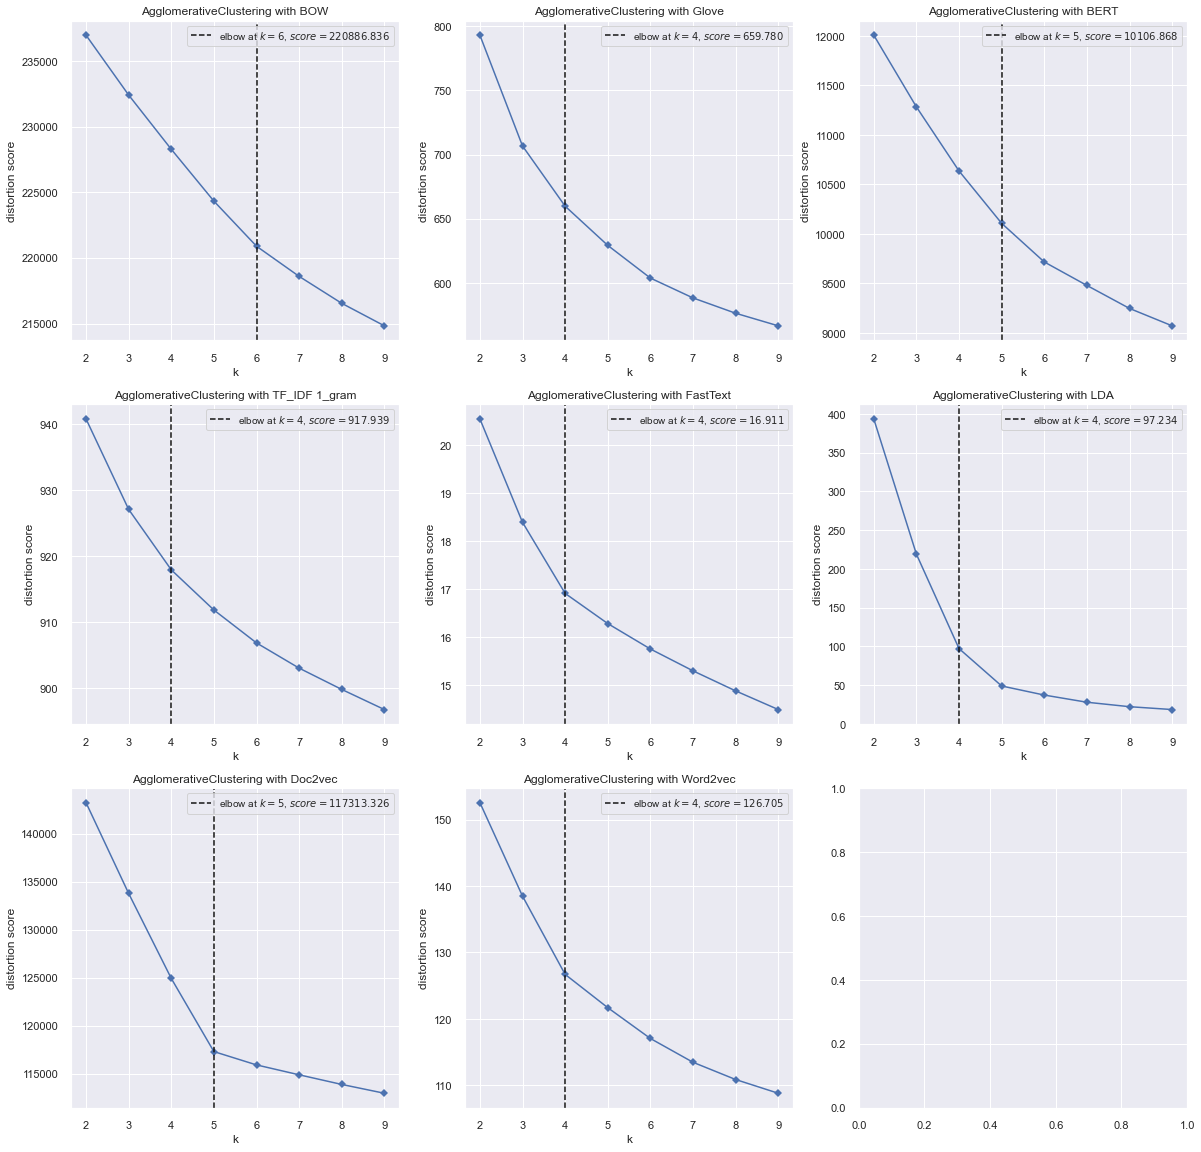

In [30]:
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt


x_size , y_size =3,3
fig, axes = plt.subplots(3, 3,figsize=(20,20))

model = AgglomerativeClustering()

visualgrid = []
for i in range(len(text_embedding.keys())):
    ax = axes[i%x_size][i//y_size]
    ax.set_title(text_embedding.keys())
    visualgrid.append(KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False, ax=axes[i%x_size][i//y_size], title = type(model).__name__ + ' with ' + list(text_embedding.keys())[i]))

for vis,key in zip(visualgrid,text_embedding.keys()):
    vis.fit(text_embedding[key])
    vis.ax.set_title(key)
    vis.finalize()

plt.show()

### Majority of the models voted for k =4.

silhouette

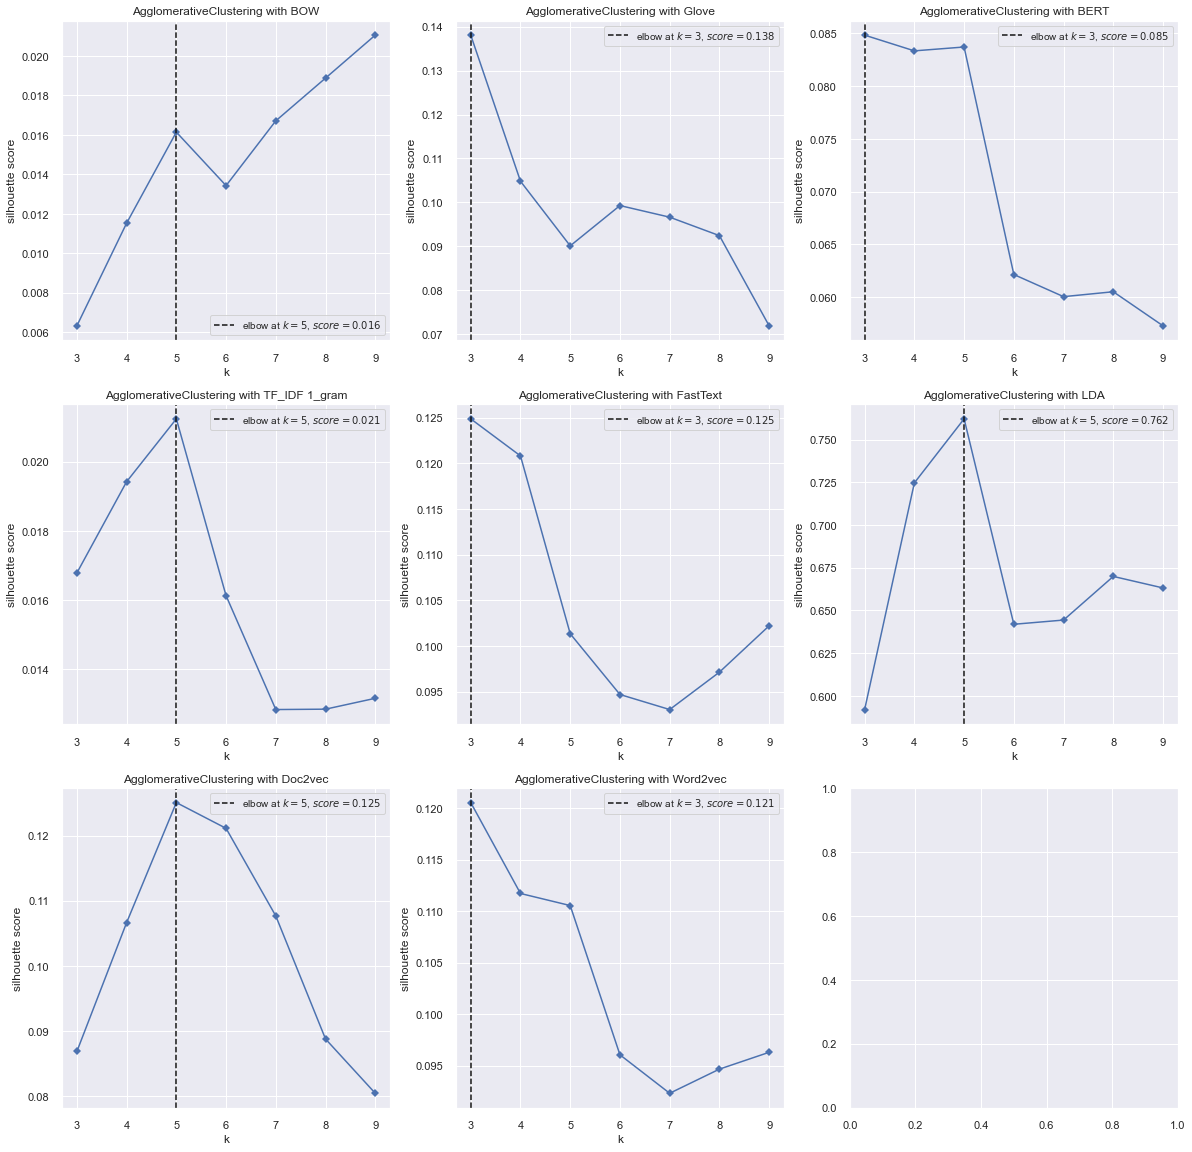

In [31]:
import matplotlib.pyplot as plt
# from yellowbrick.features import FeatureImportances
# from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC
# from sklearn.linear_model import LogisticRegression

x_size , y_size =3,3
fig, axes = plt.subplots(3, 3,figsize=(20,20))
model = AgglomerativeClustering()

visualgrid = []
for i in range(len(text_embedding.keys())):
    ax = axes[i%x_size][i//y_size]
    ax.set_title(text_embedding.keys())
    visualgrid.append(KElbowVisualizer(model, k=(3,10), metric='silhouette', timings=False, ax=axes[i%x_size][i//y_size], title = type(model).__name__ + ' with ' + list(text_embedding.keys())[i]))

for vis,key in zip(visualgrid,text_embedding.keys()):
    vis.fit(text_embedding[key])
    vis.ax.set_title(key)
    vis.finalize()

plt.show()

### Majority of the models voted for k =5.

#### Glove has .128 score at 3 </br>
#### Doc2vec has .126 score at 5 </br>
#### LDA has .762 score at 5

In [32]:
from sklearn.cluster import AgglomerativeClustering

models = [AgglomerativeClustering(n_clusters=5),
          # Birch(n_clusters=5),
          # MiniBatchKMeans(n_clusters=5),
          # KMeans(n_clusters=5),
          # SpectralClustering(n_clusters=5)
]

models_scores = {}
for model in models:
  print(type(model).__name__)
  kappa_scores = {}
  for key in text_embedding.keys():
    clustering = model.fit(text_embedding[key])
    df_labels = pd.DataFrame({'y_actual':y_df['y_actual'], 'y_pred':clustering.labels_})
    df_labels['y_pred'] = df_labels['y_pred'].apply(lambda val: label_mapping(num=val,y_actual = 'y_actual',y_target='y_pred',df_labels=df_labels ))
    df_labels['y_pred']=df_labels['y_pred'].apply(lambda x: x-1000 if x>20 else x)
    kappa_score = cohen_kappa_score(df_labels['y_actual'], df_labels['y_pred'])
    kappa_scores[key] = kappa_score
    print(key, ':', kappa_score)
  models_scores[type(model).__name__] = kappa_scores

AgglomerativeClustering
BOW : 0.38125
TF_IDF 1_gram : 0.97625
Doc2vec : 0.9925
Glove : 0.7887500000000001
FastText : 0.88625
Word2vec : 0.59375
BERT : 0.37875000000000003
LDA : 0.0012499999999999734


### The highest Kappa score is Doc2Vev With 99.25% So, this is Hierarchy champion model


In [53]:
for model_scores,model in zip(models_scores.keys(),models):
    fig = go.Figure()
    obj = go.Bar(x = list(models_scores[model_scores].keys()), y = list(models_scores[model_scores].values()))
    fig.add_trace(obj)
    fig.update_layout(title={'text':f'Kappa Score of the {type(model).__name__}','x':0.5},height=600,width=800)
    fig.show()

### Doc2vec has the highest kappa score

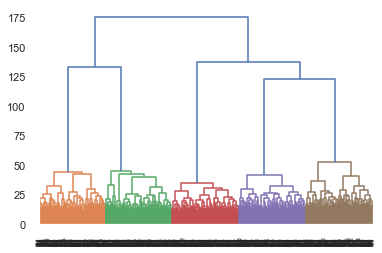

In [55]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

dendrogram = sch.dendrogram(sch.linkage(text_embedding['Doc2vec'], method='ward'))
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(text_embedding['Doc2vec'])

## EValuation 
## Compare all models with Kappa scores to check our results according to human results 

### Visualize the the top 3 models

In [54]:
Highest_kappa_models = {'Kmeans':vec_kappa['Doc2vec'],'EM':kappa_for_each_transformation['Doc2vec'],'Agglomerative':models_scores['AgglomerativeClustering']['Doc2vec']}

fig = go.Figure()
obj = go.Bar(x = list(Highest_kappa_models.keys()), y = list(Highest_kappa_models.values()))
fig.add_trace(obj)
fig.update_layout(title={'text':f'The champion models','x':0.5},yaxis_range=[.9,1],height=600,width=800)
fig.show()

### **For the above chart we diduce that the Expected Maximization has the highest kappa score.**

## Error Analysis

In [35]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
k=5
embedding=text_embedding['Doc2vec']
model =GaussianMixture(n_components=k,random_state=seed)

y_pred =model.fit_predict(embedding)
#mapping
mapping_df=pd.DataFrame({'y_actual':y_actual,'y_pred':y_pred})
mapping_df['y_pred']=mapping_df['y_pred'].apply(lambda x: label_mapping(x, 'y_actual', 'y_pred', mapping_df))
mapping_df['y_pred']=mapping_df['y_pred'].apply(lambda x: x-1000 if x >20 else x )
# mapping_df=lab(mapping_df)
wrong_examples_pred_actual=mapping_df[mapping_df['y_actual']!=mapping_df['y_pred']]
wrong_idx=mapping_df[mapping_df['y_actual']!=mapping_df['y_pred']].index.tolist()
# print(wrong_idx)
wrong_examples_pred_actual['samples']=list(embedding[wrong_idx,:])

books=pd.DataFrame()
books['labels']=y_actual
books['samples']=list(embedding)
book_means=books.groupby('labels').mean()
wrong_smi=[]
correct_smi=[]
for i in range(len(wrong_examples_pred_actual)):
    true_book=book_means.loc[wrong_examples_pred_actual.iloc[i][0]][:][0].reshape(1,-1)
    wrong_book=book_means.loc[wrong_examples_pred_actual.iloc[i][1]][:][0].reshape(1,-1)
    sample=wrong_examples_pred_actual.iloc[i][2][:].reshape(1,-1)

    wrong_similarity = cosine_similarity(sample, wrong_book)
    right_similarity = cosine_similarity(sample, true_book)
    wrong_smi.append(wrong_similarity[0][0])
    correct_smi.append(right_similarity[0][0])
wrong_examples_pred_actual['Wrong Similarity']=wrong_smi
wrong_examples_pred_actual['Correct Similarity']=correct_smi
wrong_examples_pred_actual

y_actual  y_pred                                            samples  \
148         2       3  [-2.017897, 1.4920477, 5.135055, -0.83162487, ...   
515         3       4  [-0.87295556, -0.122053936, 3.4903247, 1.45593...   
955         3       2  [0.509337, 0.23874429, 1.1509923, 1.730065, 0....   

     Wrong Similarity  Correct Similarity  
148          0.502293            0.488637  
515          0.408188            0.372067  
955          0.523525            0.499979

### We found that the samples has a higher similarity with the wrong book than the correct book similarity ,So this is caused the machine fault

In [36]:
text_embedding['Doc2vec']

array([[-1.9943391 , -0.7867337 ,  1.2632459 , ..., -2.6988447 ,
        -0.45685193,  3.0790823 ],
       [-3.0401158 , -2.9568617 ,  0.43606025, ..., -2.0422628 ,
        -0.49937335,  1.6124886 ],
       [ 0.07205338, -1.0690575 , -2.2417464 , ...,  0.5623325 ,
         1.4333072 , -1.8790379 ],
       ...,
       [ 0.01793231,  0.45213145,  2.9611912 , ..., -0.0500196 ,
        -1.3361737 , -0.41489148],
       [ 0.3175751 , -0.65038604,  1.0251708 , ..., -3.674815  ,
         0.7397858 ,  3.1794243 ],
       [-1.9063826 ,  0.8197112 ,  1.9114206 , ..., -1.2045368 ,
         0.04746356,  1.8110021 ]], dtype=float32)

In [37]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
k=5
embedding=text_embedding['Doc2vec']
model =GaussianMixture(n_components=k,random_state=seed)

y_pred =model.fit_predict(embedding)
#mapping
mapping_df=pd.DataFrame({'y_actual':y_actual,'y_pred':y_pred})
mapping_df['y_pred']=mapping_df['y_pred'].apply(lambda x: label_mapping(x, 'y_actual', 'y_pred', mapping_df))
mapping_df['y_pred']=mapping_df['y_pred'].apply(lambda x: x-1000 if x >20 else x )
# mapping_df=lab(mapping_df)
correct_examples_pred_actual=mapping_df[mapping_df['y_actual']==mapping_df['y_pred']]
correct_idx=mapping_df[mapping_df['y_actual']==mapping_df['y_pred']].index.tolist()
# print(wrong_idx)
correct_examples_pred_actual['samples']=list(embedding[correct_idx,:])

books=pd.DataFrame()
books['labels']=y_actual
books['samples']=list(embedding)
book_means=books.groupby('labels').mean()

wrong_smi=[]
correct_smi=[]
for i in range(len(correct_examples_pred_actual)):
    true_book=book_means.loc[correct_examples_pred_actual.iloc[i][0]][:][0].reshape(1,-1)
    wrong_book=book_means.loc[correct_examples_pred_actual.iloc[i][1]][:][0].reshape(1,-1)
    sample=correct_examples_pred_actual.iloc[i][2][:].reshape(1,-1)

    wrong_similarity = cosine_similarity(sample, wrong_book)
    right_similarity = cosine_similarity(sample, true_book)
    wrong_smi.append(wrong_similarity[0][0])
    correct_smi.append(right_similarity[0][0])
correct_examples_pred_actual['Wrong Similarity']=wrong_smi
correct_examples_pred_actual['Correct Similarity']=correct_smi
correct_examples_pred_actual

y_actual  y_pred                                            samples  \
0           4       4  [-1.9943391, -0.7867337, 1.2632459, -0.9644825...   
1           3       3  [-3.0401158, -2.9568617, 0.43606025, -1.883983...   
2           3       3  [0.07205338, -1.0690575, -2.2417464, 2.4557183...   
3           3       3  [-1.821571, 0.3128339, 3.4569566, -2.7618783, ...   
4           4       4  [-0.5576131, -4.0408263, -0.27218705, -2.80755...   
..        ...     ...                                                ...   
995         0       0  [0.6380006, 0.20003104, 0.7243664, -0.47728705...   
996         1       1  [0.76038814, 0.7031407, -0.39865232, -4.354607...   
997         2       2  [0.017932314, 0.45213145, 2.9611912, 3.450425,...   
998         4       4  [0.3175751, -0.65038604, 1.0251708, -3.0472424...   
999         0       0  [-1.9063826, 0.8197112, 1.9114206, 0.5110187, ...   

     Wrong Similarity  Correct Similarity  
0            0.641445            0.641445  
1            0.666048            0.666048  
2            0.601529            0.601529  
3            0.656017            0.656017  
4            0.653004            0.653004  
..                ...                 ...  
995          0.711428            0.711428  
996          0.722103            0.722103  
997          0.661277            0.661277  
998          0.728021            0.728021  
999          0.702650            0.702650  

[997 rows x 5 columns]

In [38]:
embedding

array([[-1.9943391 , -0.7867337 ,  1.2632459 , ..., -2.6988447 ,
        -0.45685193,  3.0790823 ],
       [-3.0401158 , -2.9568617 ,  0.43606025, ..., -2.0422628 ,
        -0.49937335,  1.6124886 ],
       [ 0.07205338, -1.0690575 , -2.2417464 , ...,  0.5623325 ,
         1.4333072 , -1.8790379 ],
       ...,
       [ 0.01793231,  0.45213145,  2.9611912 , ..., -0.0500196 ,
        -1.3361737 , -0.41489148],
       [ 0.3175751 , -0.65038604,  1.0251708 , ..., -3.674815  ,
         0.7397858 ,  3.1794243 ],
       [-1.9063826 ,  0.8197112 ,  1.9114206 , ..., -1.2045368 ,
         0.04746356,  1.8110021 ]], dtype=float32)

In [39]:
mapping_df

y_actual  y_pred
0           4       4
1           3       3
2           3       3
3           3       3
4           4       4
..        ...     ...
995         0       0
996         1       1
997         2       2
998         4       4
999         0       0

[1000 rows x 2 columns]

### Find the 10 most frequent words in wrong sample and both wrong, and correct predicted books and compare

In [40]:
data_frame

Sample of the book  Book_name
0    redound smoke ruddy flame eye sudden view appe...          4
1    lave fade still gorgeous skirt asiatic land ol...          3
2    inventor patentee free ridiculous false delica...          3
3    landsman flat vertical tail whereas among spou...          3
4    first make common unhallowed ere taste yet fou...          4
..                                                 ...        ...
995  scruple engage faith honour already bound even...          0
996  shall surely prince judah like remove bound th...          1
997  prove anything heart throb must sentimental ma...          2
998  fertile earth soft shower sweet come grateful ...          4
999  dear near relation say near fear shock young l...          0

[1000 rows x 2 columns]

In [41]:
data_frame.groupby(['Book_name'], as_index=False).agg({'Sample of the book': ' '.join}).iloc[1,1]

'saith unto peace unto terrify affright suppose see spirit say unto ye troubled thought arise heart behold hand foot handle see spirit hath flesh bone ye see thus spoken shew hand foot yet believe joy wonder say unto ye meat give piece broil fish honeycomb take eat say unto word spake unto yet thing must fulfil write law moses prophet psalm concern open understand might understand scripture say unto thus write thus behove christ suffer rise dead third day repentance remission sin preach name among nation begin jerusalem ye witness thing behold send promise father upon tarry ye city jerusalem ye endue power high lead far bethany lift hand bless come pas bless part carry heaven worship return jerusalem great joy continually temple praise blessing god amen gospel accord saint john begin word word god word god begin god thing make without thing make make life life light men light  none understood first year darius son ahasuerus seed medes make king realm chaldean first year reign daniel un

In [42]:
data_frame.groupby(['Book_name'], as_index=False).agg({'Sample of the book': ' '.join}).iloc[0,1]

'beyond three creature world rather suspect evil willoughby whose heart know well elinor contend reply whoever may detestably enemy let cheat malignant triumph dear sister see nobly consciousness innocence good intention support spirit reasonable laudable pride resists malevolence cry marianne misery mine pride care know wretched triumph see may open world elinor elinor suffer little may proud independent like may resist insult return mortification must feel must wretched welcome enjoy consciousness mother sake mine appear happy miserable oh require silent elinor employ walk thoughtfully fire window window fire without know receive warmth one discern object marianne seat foot bed head lean one post take willoughby letter shudder every sentence exclaim much oh willoughby willoughby cruel cruel nothing acquit elinor nothing whatever might heard ought suspend belief ought told give power clearing lock hair repeat letter obligingly bestow unpardonable willoughby heart write word oh barbaro

### Draw the most frequent wards in each book

Draw the most frequent wards in each wrong sample

actual label 2
predicted label 3


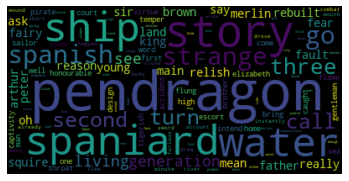

actual label 3
predicted label 4


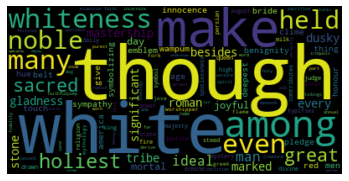

actual label 3
predicted label 2


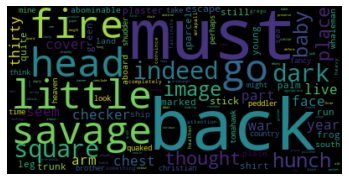

In [44]:
from wordcloud import WordCloud
sample_analsis = pd.concat([wrong_examples_pred_actual[['y_actual','y_pred']], data_frame.loc[wrong_idx]['Sample of the book']], axis=1)

for i in range(len(sample_analsis)):

  print('actual label', sample_analsis['y_actual'].iloc[i])
  print('predicted label', sample_analsis['y_pred'].iloc[i])
  text = sample_analsis['Sample of the book'].iloc[i]

  # Create and generate a word cloud image:
  wordcloud = WordCloud().generate(text)

  # Display the generated image:
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [45]:
sample_analsis

y_actual  y_pred                                 Sample of the book
148         2       3  spanish main reason ask father brown mean rebu...
515         3       4  man ideal mastership every dusky tribe though ...
955         3       2  chest arm live cover part checker square face ...

In [46]:
from collections import Counter

for i in range(len(sample_analsis)):
  y_actual = sample_analsis['y_actual'].iloc[i]
  y_pred = sample_analsis['y_pred'].iloc[i]
  sample = sample_analsis['Sample of the book'].iloc[i]
  counter = Counter(sample.split())
  most_occur = counter.most_common(10)

  true_label = Counter(data_frame.groupby(['Book_name'], as_index=False).agg({'Sample of the book': ' '.join}).iloc[y_actual,1].split())
  wrong_label = Counter(data_frame.groupby(['Book_name'], as_index=False).agg({'Sample of the book': ' '.join}).iloc[y_pred,1].split())

  word_freq_in_both_books = {}
  for word, occur in most_occur:
    word_freq_in_both_books[word] = {'true_label':true_label[word], 'wrong_label': wrong_label[word],'diff':(true_label[word] - wrong_label[word]) ,'occur': occur}
  print(pd.DataFrame(word_freq_in_both_books).T)
  print('*'*50)
  print('*'*50)

           true_label  wrong_label  diff  occur
pendragon          30            0    30      5
story              41           16    25      3
spaniard            6            2     4      3
ship               16          150  -134      3
water              27           88   -61      3
spanish             4            4     0      2
strange            23           26    -3      2
go                163          124    39      2
three              43           69   -26      2
second             20           16     4      2
**************************************************
**************************************************
           true_label  wrong_label  diff  occur
though            113          153   -40      9
white              83            3    80      8
make              109           73    36      4
among              53           42    11      3
whiteness           7            0     7      2
even               63           36    27      2
many               47           45

In [47]:
most_occur

[('back', 3),
 ('must', 3),
 ('savage', 3),
 ('head', 3),
 ('go', 3),
 ('little', 3),
 ('fire', 3),
 ('square', 2),
 ('dark', 2),
 ('indeed', 2)]

In [48]:
sample_analsis

y_actual  y_pred                                 Sample of the book
148         2       3  spanish main reason ask father brown mean rebu...
515         3       4  man ideal mastership every dusky tribe though ...
955         3       2  chest arm live cover part checker square face ...

In [49]:
data_frame.groupby(['Book_name'], as_index=False).agg({'Sample of the book': ' '.join}).iloc[0,1]

'beyond three creature world rather suspect evil willoughby whose heart know well elinor contend reply whoever may detestably enemy let cheat malignant triumph dear sister see nobly consciousness innocence good intention support spirit reasonable laudable pride resists malevolence cry marianne misery mine pride care know wretched triumph see may open world elinor elinor suffer little may proud independent like may resist insult return mortification must feel must wretched welcome enjoy consciousness mother sake mine appear happy miserable oh require silent elinor employ walk thoughtfully fire window window fire without know receive warmth one discern object marianne seat foot bed head lean one post take willoughby letter shudder every sentence exclaim much oh willoughby willoughby cruel cruel nothing acquit elinor nothing whatever might heard ought suspend belief ought told give power clearing lock hair repeat letter obligingly bestow unpardonable willoughby heart write word oh barbaro

0


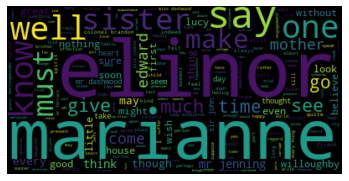

1


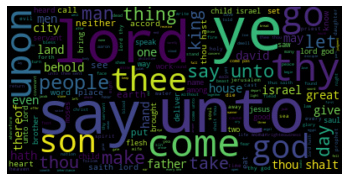

2


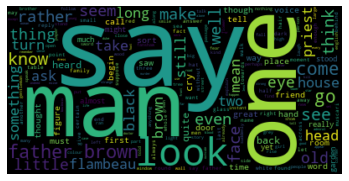

3


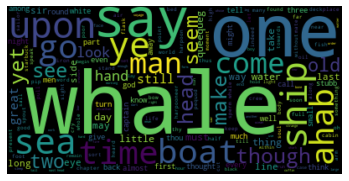

4


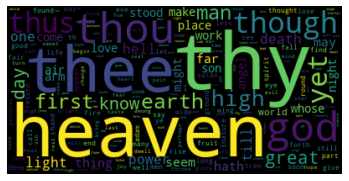

In [50]:
for i in range(5):
  print(i)
  text = data_frame.groupby(['Book_name'], as_index=False).agg({'Sample of the book': ' '.join}).iloc[i,1]
  wordcloud = WordCloud().generate(text)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

In [51]:
from collections import Counter

text = data_frame.groupby(['Book_name'], as_index=False).agg({'Sample of the book': ' '.join}).iloc[0,1].split()
Counter = Counter(text)
most_occur = Counter.most_common(10)

print(most_occur)

[('elinor', 408), ('mr', 402), ('say', 341), ('marianne', 328), ('every', 208), ('sister', 201), ('well', 193), ('know', 192), ('one', 187), ('make', 171)]


In [52]:
sample_analsis['Sample of the book']

148    spanish main reason ask father brown mean rebu...
515    man ideal mastership every dusky tribe though ...
955    chest arm live cover part checker square face ...
Name: Sample of the book, dtype: object